In [1]:
# Objective

#The aim is to classify iris flowers among three species from measurements of sepals and petals' length and width.The iris data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.The central goal here is to design a model that makes useful classifications for new flowers or, in other words, one which exhibits good generalization.

In [3]:
#Importing Libraries

In [7]:
import pandas as pd

In [9]:
import numpy as np

In [11]:
import matplotlib.pyplot as plt

In [13]:
import seaborn as sns

In [23]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [25]:
#Importing Data from csv file

In [27]:
columns =["SepallengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm","Species"]
dataset = pd.read_csv('iris_data.csv', names=columns)

In [29]:
dataset.head()

,SepallengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
dataset.tail()

,SepallengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [33]:
dataset.shape

(150, 5)

In [35]:
# EDA - Exploratory Data Analysis

In [37]:
#Histogram of Petal Length

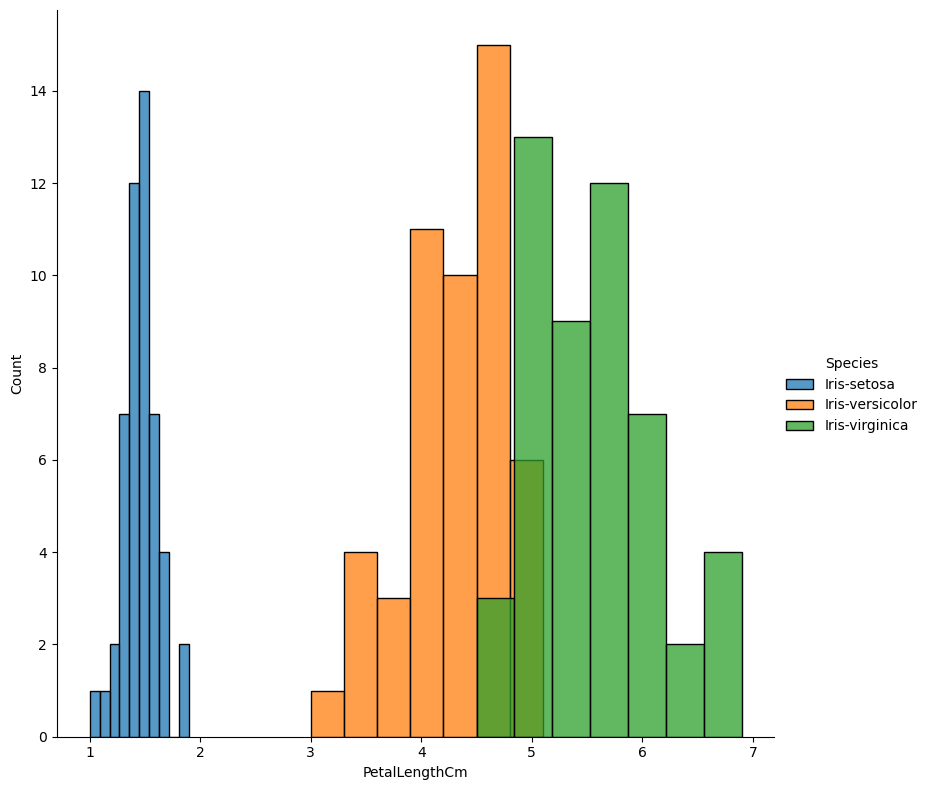

In [49]:
sns.FacetGrid(dataset, hue="Species",height=8)\
.map(sns.histplot,"PetalLengthCm")\
.add_legend()
plt.show()

In [ ]:
# Histogram of Petal width

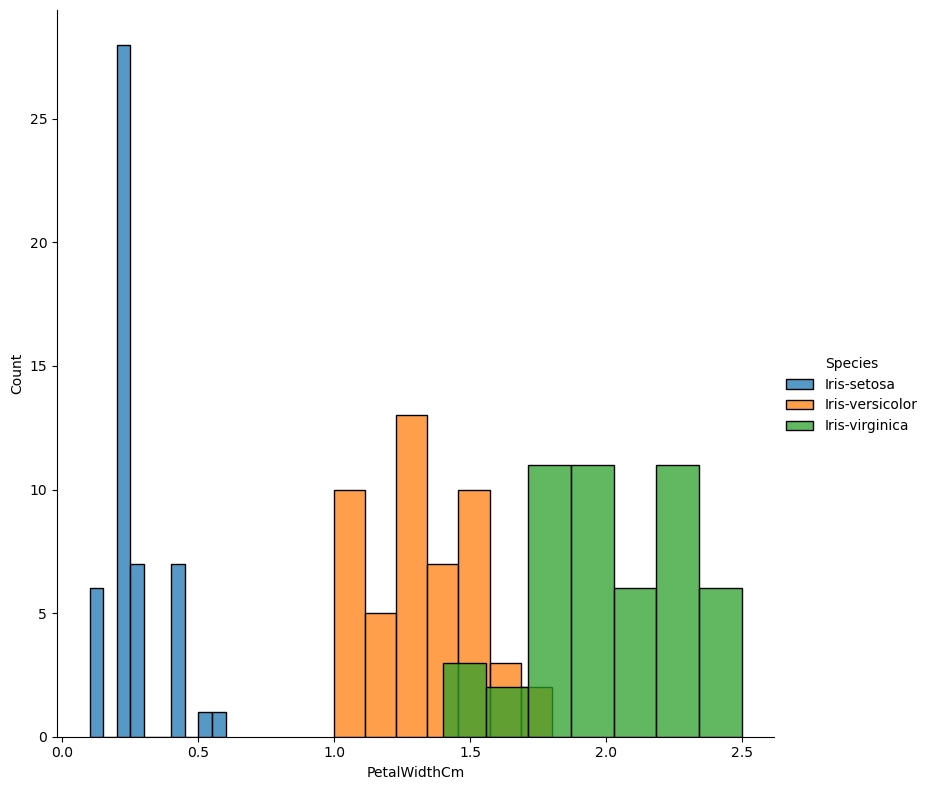

In [51]:
sns.FacetGrid(dataset, hue="Species",height=8)\
.map(sns.histplot,"PetalWidthCm")\
.add_legend()
plt.show()

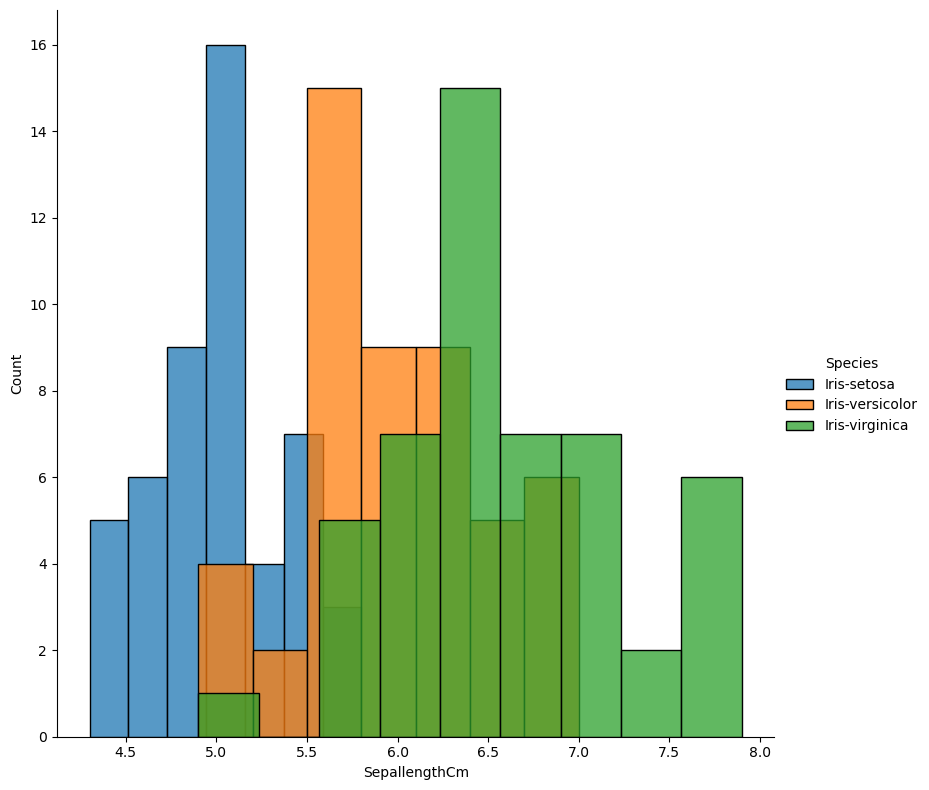

In [55]:
sns.FacetGrid(dataset, hue="Species",height=8)\
.map(sns.histplot,"SepallengthCm")\
.add_legend()
plt.show()

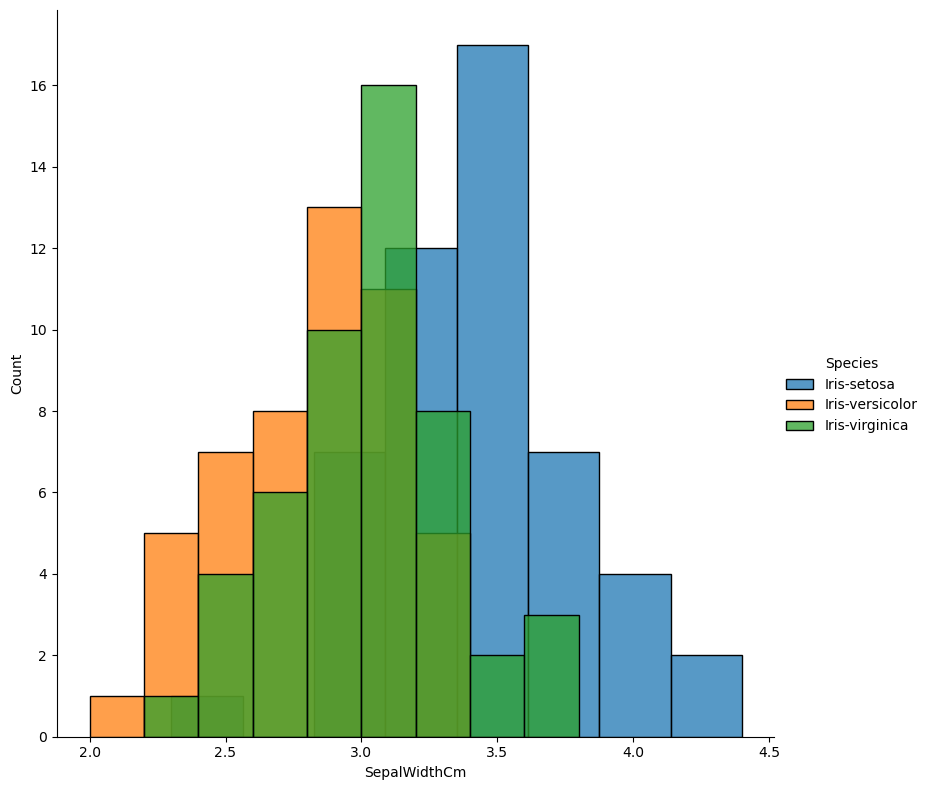

In [57]:
sns.FacetGrid(dataset, hue="Species",height=8)\
.map(sns.histplot,"SepalWidthCm")\
.add_legend()
plt.show()

In [ ]:
#2D Scatter Plot

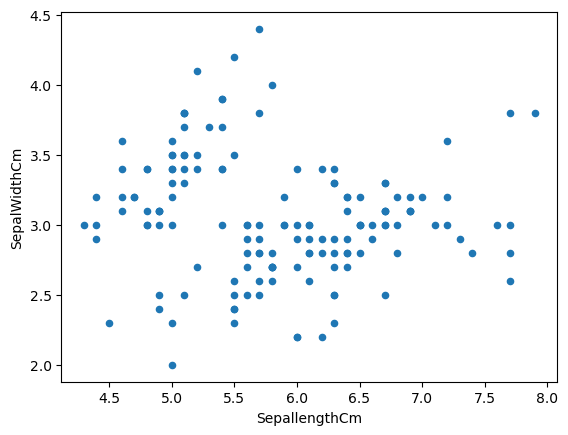

In [61]:
dataset.plot(kind ='scatter', x='SepallengthCm',y='SepalWidthCm')
plt.show()

In [ ]:
# 2D scatter plot with colour -coding for each flower type/class

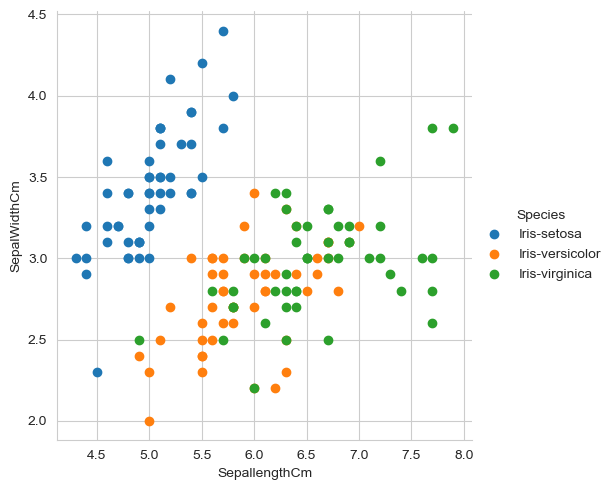

In [67]:
sns.set_style("whitegrid")
sns.FacetGrid(dataset, hue ="Species", height=5)\
.map(plt.scatter, "SepallengthCm", "SepalWidthCm")\
.add_legend()
plt.show()

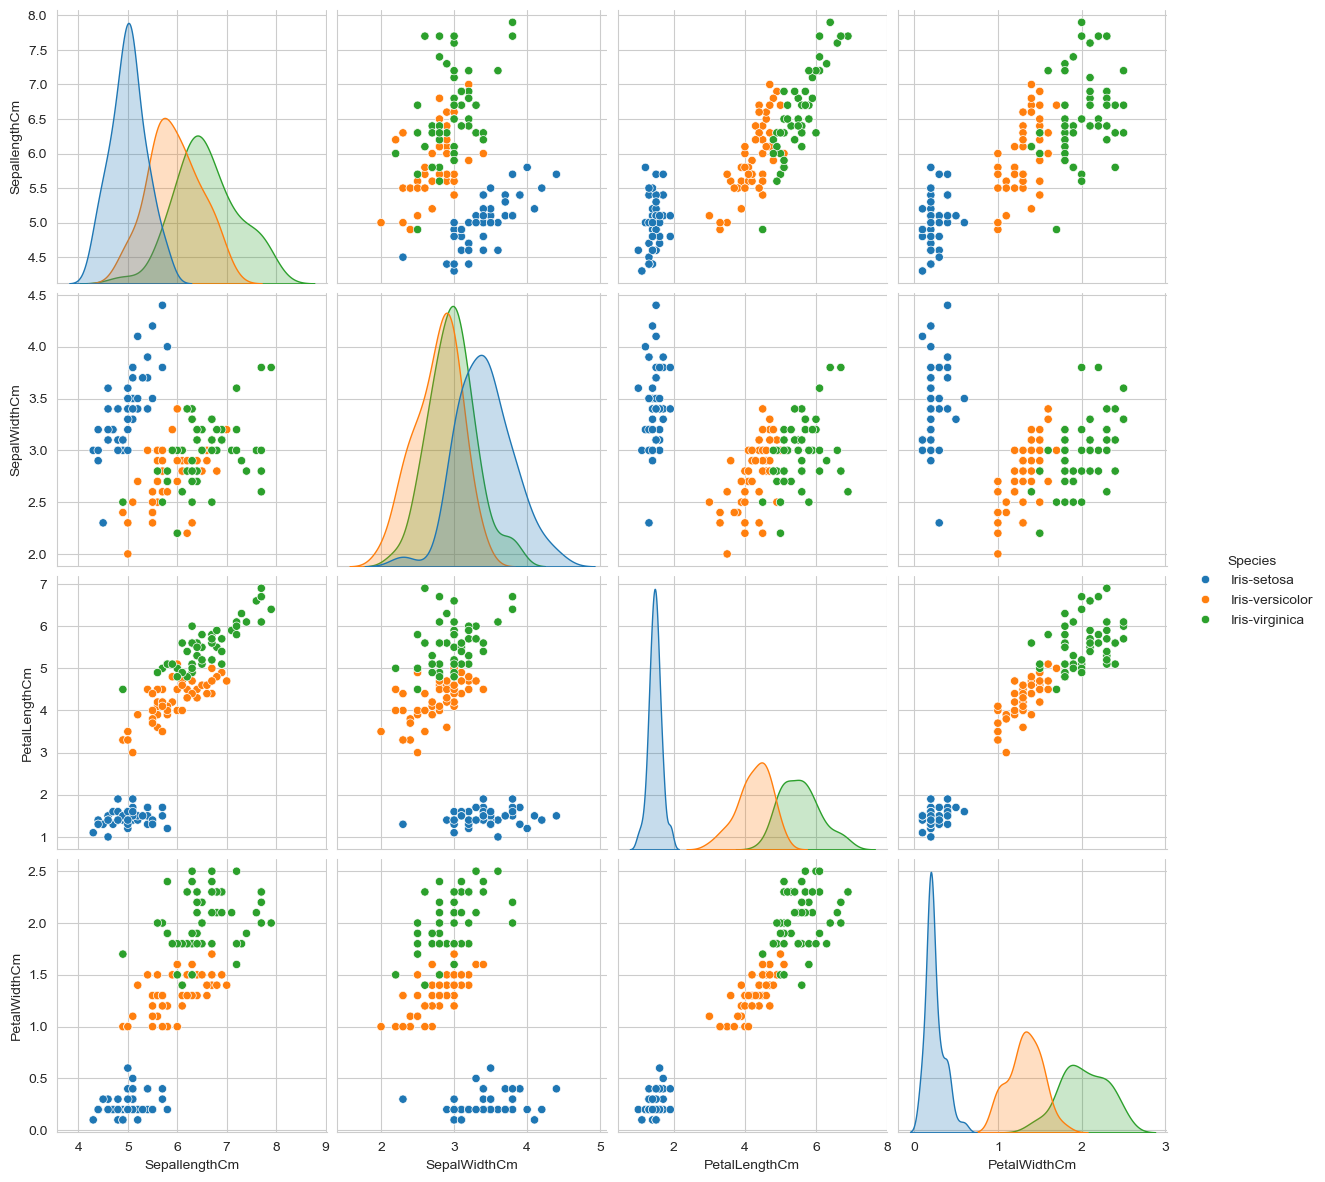

In [71]:
sns.set_style("whitegrid")
sns.pairplot(dataset, hue ="Species", height =3, aspect=1)
plt.show()

In [73]:
# Data Processing

In [75]:
dataset["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [77]:
dataset.tail()

,SepallengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [79]:
#Descriptive statistics of data set

In [83]:
dataset.describe()

,SepallengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [85]:
#Checking for Null values

In [89]:
dataset.isnull().sum()

SepallengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [91]:
dataset['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [93]:
#Label Encoding

In [99]:
label_encoder = preprocessing.LabelEncoder()
dataset['Species']= label_encoder.fit_transform(dataset['Species'])

dataset['Species'].unique()

array([0, 1, 2])

In [101]:
#splitting the dataset

In [125]:
X = dataset.iloc[:, [2,3]].values

y = dataset.iloc[:, 4].values

In [127]:
len(X)

150

In [107]:
len(y)

150

In [109]:
#heatmap is to identify the highly correlated features

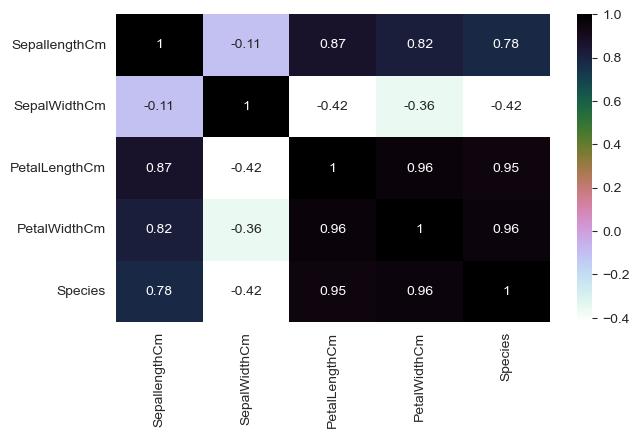

In [111]:
plt.figure(figsize=(7,4))
sns.heatmap(dataset.corr(), annot =True, cmap ='cubehelix_r')
plt.show()

In [121]:
# Model Development
# splitting the dataset into train set and test set

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 2)

In [131]:
#Feature scaling

In [135]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [ ]:
# Decision Classifier

In [137]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion ='entropy', random_state =0)

In [156]:
DecisionTreeClassifier(ccp_alpha =0.0, class_weight =None, criterion ='entropy', max_depth =None, max_features =None, max_leaf_nodes =None,
                       min_impurity_decrease=0.0, min_samples_leaf =1,min_samples_split =2, 
                       min_weight_fraction_leaf=0.0,random_state =0, splitter ='best')

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [160]:
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
#Making the confusion matrix

In [162]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[17,  0,  0],
       [ 0, 13,  2],
       [ 0,  0, 13]])

In [ ]:
#Visualization

In [166]:
# Visualising the Training set results

/var/folders/sp/9bs7z98n68j_l36z1yyr1h680000gn/T/ipykernel_86521/3641351292.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],


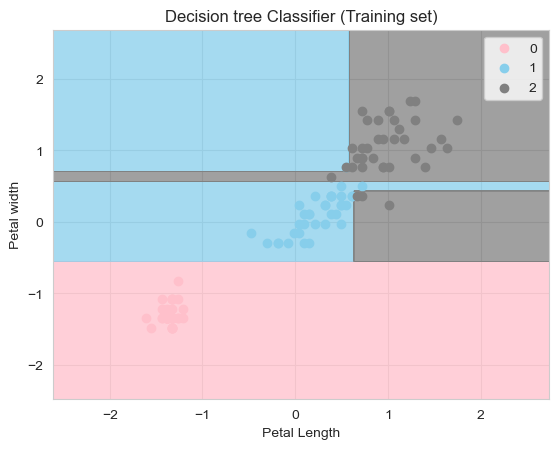

In [172]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() -1, stop = X_set[:,0].max() +1, step = 0.01),
                    np.arange(start = X_set[:,1].min() -1, stop = X_set[:,1].max() +1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'skyblue','gray')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],
               c = ListedColormap(('pink', 'skyblue','gray'))(i),label = j)

plt.title('Decision tree Classifier (Training set)')
plt.xlabel('Petal Length')
plt.ylabel('Petal width')
plt.legend()
plt.show()

/var/folders/sp/9bs7z98n68j_l36z1yyr1h680000gn/T/ipykernel_86521/3784985433.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


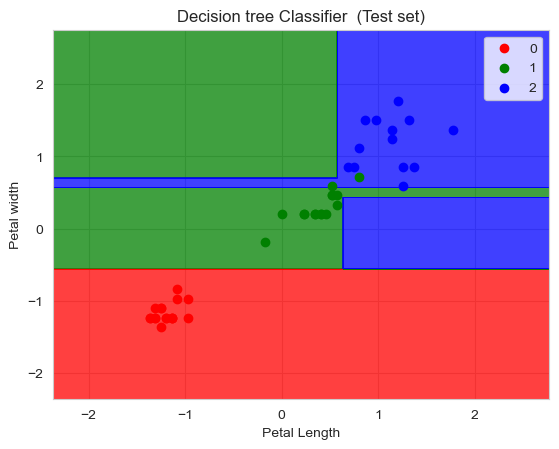

In [174]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','blue'))(i), label = j)
plt.title('Decision tree Classifier  (Test set)')
plt.xlabel('Petal Length')
plt.ylabel('Petal width')
plt.legend()
plt.show()

In [ ]:
#Accuracy

In [176]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
print('The accuracy of the Decision Tree Classifier is : %.2f'%accuracy_score(y_pred,y_test))
rmse = sqrt(mean_squared_error(y_test, y_pred))
print("RMSE value = %.2f"%rmse)
print("R2 Score= %.2f"%r2_score(y_test, y_pred))

The accuracy of the Decision Tree Classifier is : 0.96
RMSE value = 0.21
R2 Score= 0.93


In [178]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        17\n           1       1.00      0.87      0.93        15\n           2       0.87      1.00      0.93        13\n\n    accuracy                           0.96        45\n   macro avg       0.96      0.96      0.95        45\nweighted avg       0.96      0.96      0.96        45\n'

In [ ]:
#KNN Algorithm

In [180]:
from sklearn import neighbors
model = neighbors.KNeighborsClassifier(n_neighbors =3)

In [182]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [184]:
predict = model.predict(X_test)

In [186]:
#for checking the model accuracy
print('The accuracy of the KNN is',accuracy_score(predict,y_test))
rmse = sqrt(mean_squared_error(y_test, predict))
print("RMSE value = %.2f"%rmse)
print("R2 Score= %.2f"%r2_score(y_test, predict))


The accuracy of the KNN is 0.9555555555555556
RMSE value = 0.21
R2 Score= 0.93


In [ ]:
#SVM

In [188]:
from sklearn import svm
svc = svm.SVC(C=1.0, kernel='rbf')

In [190]:
svc.fit(X_train,y_train)

SVC()

In [192]:
pred = svc.predict(X_test)

In [194]:
#Validation

In [196]:
print('The accuracy of the SVM is: %.2f'%accuracy_score(pred,y_test))
rmse = sqrt(mean_squared_error(y_test, pred))
print("RMSE value = %.2f"%rmse)
print("R2 Score= %.2f"%r2_score(y_test, pred))

The accuracy of the SVM is: 0.98
RMSE value = 0.15
R2 Score= 0.97


In [198]:
#Logistic Regression

In [200]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [202]:
#Accuracy

In [206]:
print('The accuracy of the Logistic Regression using Petals is:',accuracy_score(prediction,y_test))
rmse = sqrt(mean_squared_error(y_test, prediction))
print("RMSE value = %.2f"%rmse)
print("R2 Score= %.2f"%r2_score(y_test, prediction))

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777
RMSE value = 0.15
R2 Score= 0.97


In [208]:
# Naive_Bayes

In [212]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
predicted = model.predict(X_test)

In [214]:
#accuracy

In [220]:
print('The accuracy of the naive bayes is:', accuracy_score(predicted, y_test))
rmse = sqrt(mean_squared_error(y_test, predicted))
print("RMSE value = %.2f" %rmse)
print("R2 score = %.2f" %r2_score(y_test, predicted))

The accuracy of the naive bayes is: 0.9777777777777777
RMSE value = 0.15
R2 score = 0.97
